# easy beginning

## Import related packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from scuteegfe import Feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne

## Generate artificial signals 
We generate five-channel signals with special frequency bands. The five channels have high amplitude in the following frequency bands: Delta (1-4 Hz), Theta (4-8 Hz), Alpha (8-13 Hz), Beta (13-30 Hz), and Gamma (30-50 Hz). 

### Generate time signals 

In [2]:
sfreq = 256  
t = np.arange(0, 10, 1/sfreq)  
delta = np.sin(2 * np.pi * 2 * t)  # Delta (1-4 Hz)
theta = np.sin(2 * np.pi * 6 * t)  # Theta (4-8 Hz)
alpha = np.sin(2 * np.pi * 10 * t)  # Alpha (8-13 Hz)
beta = np.sin(2 * np.pi * 20 * t)  # Beta (13-30 Hz)
gamma = np.sin(2 * np.pi * 40 * t)  # Gamma (30-100 Hz
data = np.vstack([delta, theta, alpha, beta, gamma])
print(data.shape)

(5, 2560)


### Place the signal into MNE's raw structure.

In [3]:
info = mne.create_info(ch_names=['delta', 'theta', 'alpha', 'beta', 'gamma'], sfreq=sfreq, ch_types='eeg')
raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=5, n_times=2560
    Range : 0 ... 2559 =      0.000 ...     9.996 secs
Ready.


### plot signals

Using matplotlib as 2D backend.


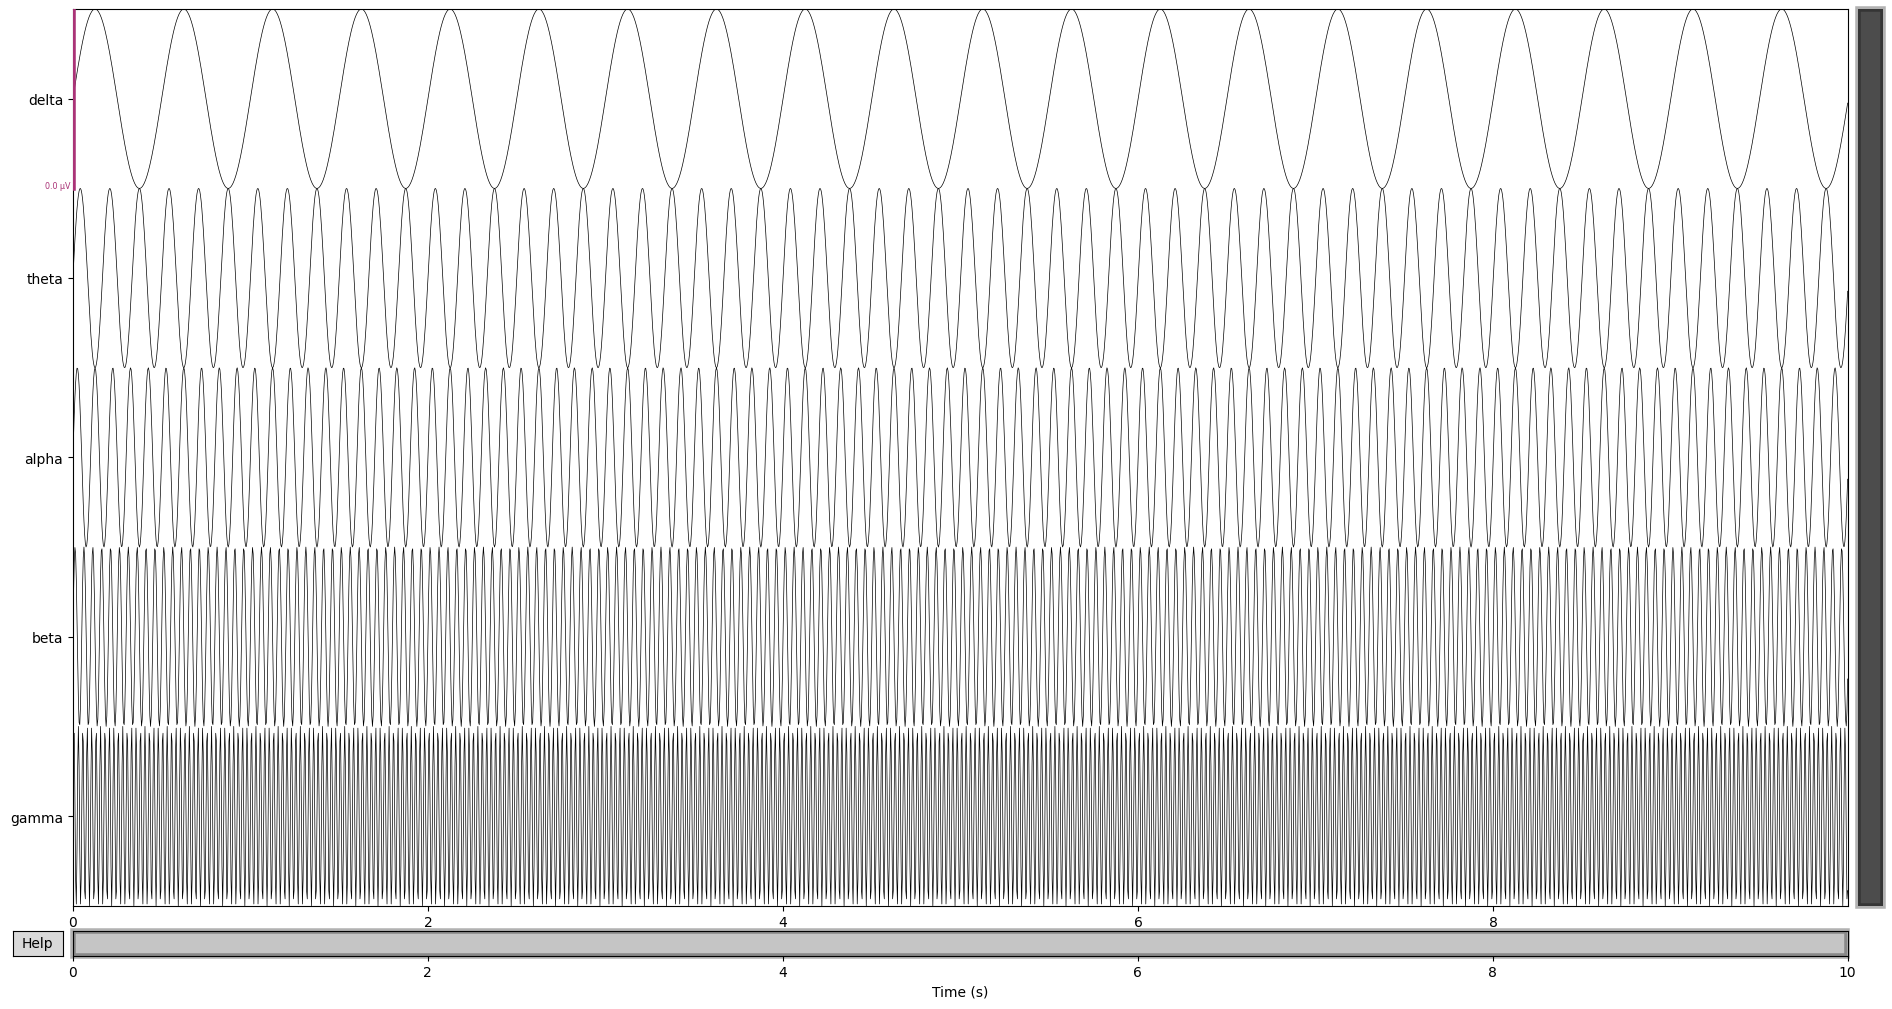

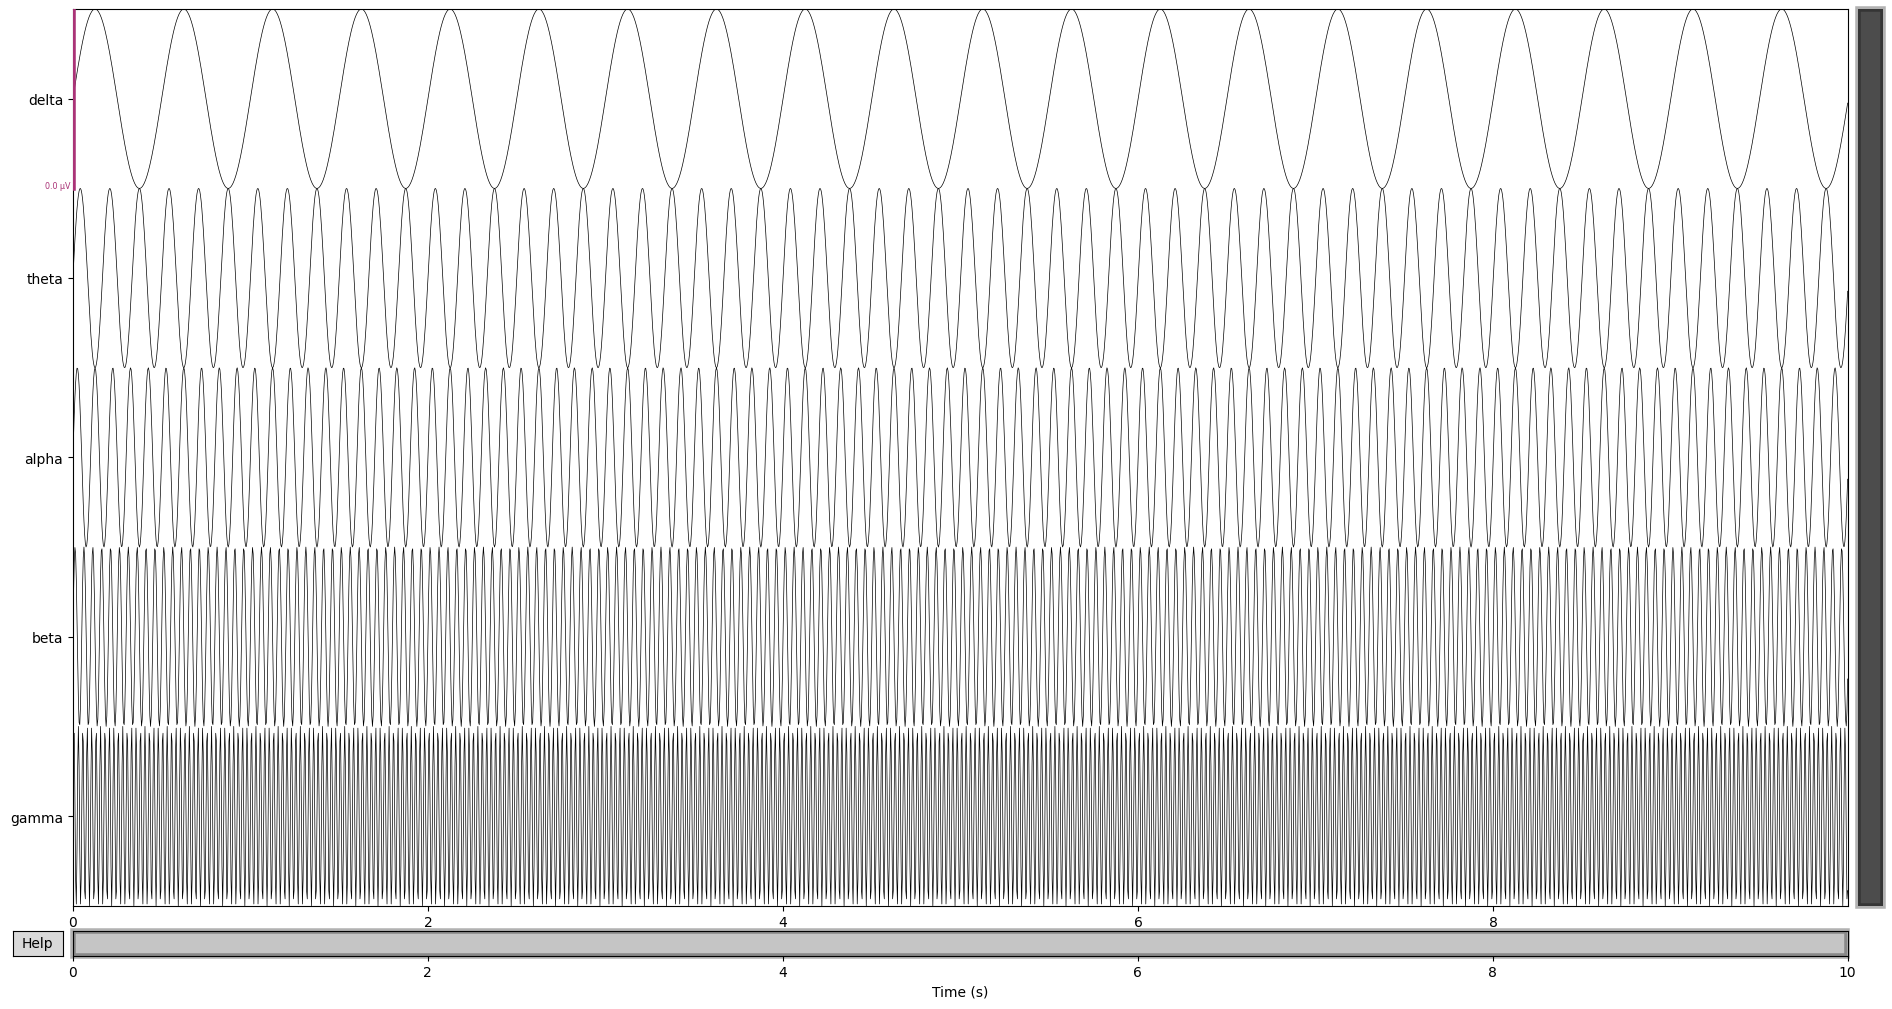

In [4]:
# plot time series
raw.plot(n_channels=5, scalings='auto', title='Time Domain Signals', show=False)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


C:\Users\15956\AppData\Local\Temp\ipykernel_34216\3419607408.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = raw.plot_psd(fmax=50, n_fft=2048, show=False)


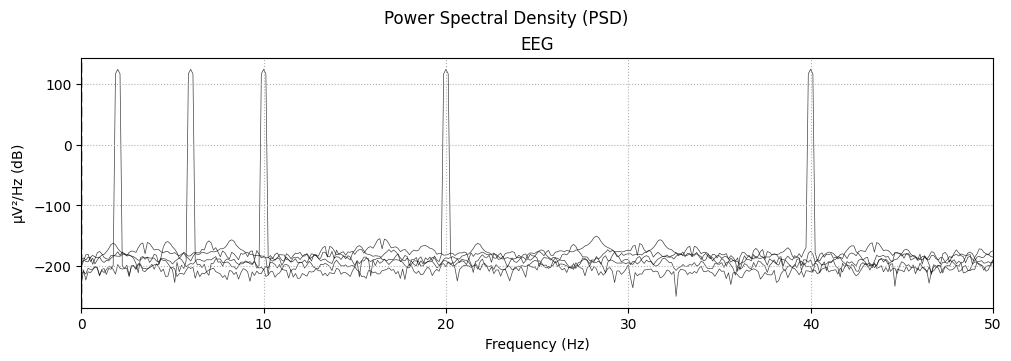

In [5]:
# plot psd
fig = raw.plot_psd(fmax=50, n_fft=2048, show=False)
fig.suptitle('Power Spectral Density (PSD)')
plt.show()

## calculate feature by scuteegfe
'pow_freq_bands' is in mne-feature function. We introduce its usage in scuteegfe, which is the same as mne-feature package. selected_funcs is a list contained all func str that you need. funcs_params is a dict for your funcs_params. 

### calculate
data shape (n_epochs, n_channels, n_times)

In [6]:
print(data[None,:].shape)

(1, 5, 2560)


The function in API ["compute_pow_freq_bands"](https://mne.tools/mne-features/generated/mne_features.univariate.compute_pow_freq_bands.html#mne_features.univariate.compute_pow_freq_bands), correlated  selected_funcs is ['pow_freq_bands']. This is consistent with the [MNE-Feature](https://mne.tools/mne-features/generated/mne_features.feature_extraction.FeatureExtractor.html#mne_features.feature_extraction.FeatureExtractor) package.

In [ ]:
fea = Feature(data[None,:], sfreq=sfreq, selected_funcs=['pow_freq_bands'],
               funcs_params={"pow_freq_bands__freq_bands":np.array([[1,4],[4,8],[8,13],[18,22],[30,50]]),
                            "pow_freq_bands__normalize": False})

### return description

In [8]:
print(fea)

1(epochs) x 5(channels) x 5(features)
feature names: ['pow_freq_bands0' 'pow_freq_bands1' 'pow_freq_bands2' 'pow_freq_bands3'
 'pow_freq_bands4']


In [9]:
n_epochs, n_channels, n_features = fea.features.shape
print(n_epochs, n_channels, n_features)

1 5 5


In [10]:
df = pd.DataFrame(np.squeeze(fea.features), columns=fea.feature_names)
df.index = [f'Channel {i+1}' for i in range(n_channels)]
df

,pow_freq_bands0,pow_freq_bands1,pow_freq_bands2,pow_freq_bands3,pow_freq_bands4
Channel 1,5.000000e-01,3.331320e-32,1.434390e-32,2.252499e-31,2.568837e-31
Channel 2,7.581579e-32,5.000000e-01,1.339228e-31,5.540426e-31,2.085246e-30
Channel 3,2.337820e-29,5.342350e-31,5.000000e-01,2.548555e-29,1.695981e-29
Channel 4,3.193826e-29,8.265879e-29,9.076266e-29,5.000000e-01,1.496328e-28
Channel 5,1.648561e-29,8.346900e-29,1.349165e-29,2.121023e-29,5.000000e-01
